# Loaded Dice

Tommy seems to be winning a lot of games recently. You are, in fact, *highly suspicious* of his treasured dice. So you've been recording the result of every role, and they are in `loaded_500.txt`. 

Let's try and answer the simplest question we can: Is *Tommy* rolling too many sixes?

Let's answer the question rigorously.

1. Visualise the data. Make sure we understand it.
2. Reduce or quantify the data
3. Pose our hypothesis (and visualise)
4. Calculate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("data\loaded_500.txt")

### Visualising

A historgram should do fine, this is very simple data.

[1. 2. 3. 4. 5. 6.] [70 84 86 74 88 98]


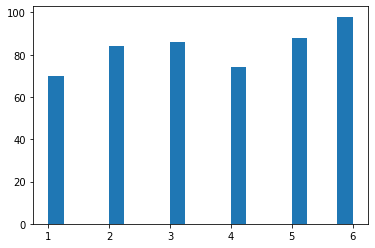

In [2]:
unique, counts = np.unique(data, return_counts=True)
print(unique, counts)
plt.hist(data, bins=20);

### Reduce or quantify data

We don't need each individual roll. We really just want the total number of sixes rolled and the total number of rolls.

In [3]:
num_sixes = (data == 6).sum()
num_total = data.size

### Pose our Hypothesis

We have two outcomes when we roll a dice. We roll a six, or we roll something else. With a fair die (our null hypothesis), $p(6) = \frac{1}{6}$. As this is discrete with two options, we are looking at the *binomial* distribution.

What is the chance we roll 98 *or more* sixes with a fair die?

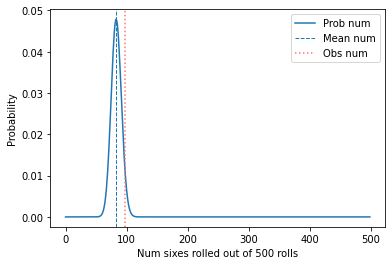

In [4]:
from scipy.stats import binom
n = np.arange(num_total)
prob_n = binom.pmf(n, num_total, 1/6)
plt.plot(n, prob_n, label="Prob num")
plt.axvline(num_total / 6, ls="--", lw=1, label="Mean num")
plt.axvline(num_sixes, ls=":", color="#ff7272", label="Obs num")
plt.xlabel(f"Num sixes rolled out of {num_total} rolls")
plt.ylabel("Probability")
plt.legend();

Only 3.7% of the time with a fair dice you'd roll this many or more sixes.


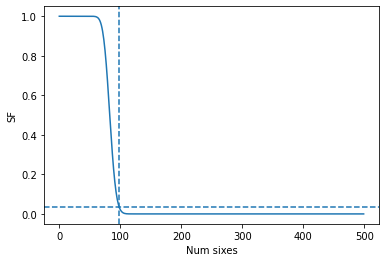

In [5]:
d = binom(num_total, 1/6)
plt.plot(n, d.sf(n))
plt.axvline(num_sixes, ls="--")
sf = d.sf(num_sixes)
plt.axhline(sf, ls="--")
plt.xlabel("Num sixes")
plt.ylabel("SF");
print(f"Only {sf * 100:.1f}% of the time with a fair dice you'd roll this many or more sixes.")